<a href="https://colab.research.google.com/github/kenltho2/Num-Meth23/blob/main/Project5ver1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Direct Method

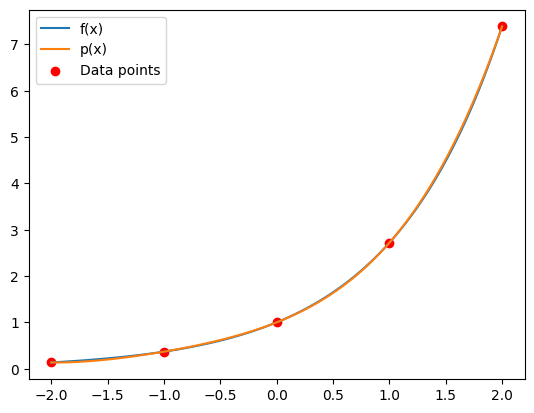

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Gauss-Jordan elimination function
def gauss_jordan_elimination(A):
    n = A.shape[0]
    for i in range(n):
        # Find the row with the maximum absolute value in the current column
        max_row = i
        for j in range(i+1, n):
            if abs(A[j,i]) > abs(A[max_row,i]):
                max_row = j
        
        # Swap the current row with the row with maximum absolute value
        A[[i,max_row]] = A[[max_row,i]]
        
        # Normalize the current row
        A[i] = A[i] / A[i,i]
        
        # Eliminate the current column in the other rows
        for j in range(n):
            if j != i:
                A[j] = A[j] - A[j,i] * A[i]
    
    # Extract the solution
    solution = A[:,n]
    
    return solution

# Define the function f that we want to interpolate
def f(x):
    return np.exp(x)

# Define the five points we want to interpolate
x = np.array([-2.0, -1.0, 0.0, 1.0, 2.0])
y = f(x)

# Construct the Vandermonde matrix
V = np.vander(x, increasing=True)

# Solve for the coefficients of the polynomial using Gauss-Jordan elimination
coefficients = gauss_jordan_elimination(np.hstack((V, y[:,np.newaxis])))

# Define the polynomial function using the coefficients
def p(x):
    n = len(coefficients)
    return sum(coefficients[i]*x**i for i in range(n))

# Generate points to plot the original function and the polynomial
t = np.linspace(-2, 2, 100)
plt.plot(t, f(t), label='f(x)')
plt.plot(t, p(t), label='p(x)')
plt.scatter(x, y, color='red', label='Data points')

plt.legend()
plt.show()


##Linear Spline

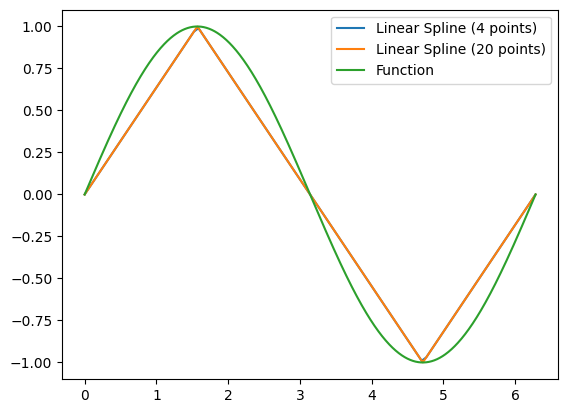

In [4]:
# Define the function to be interpolated
def f(x):
    return np.sin(x)

# Define the linear spline algorithm
def linear_spline(x, y, xx):
    n = len(x)
    for i in range(n-1):
        if x[i] <= xx <= x[i+1]:
            return y[i] + (y[i+1] - y[i])/(x[i+1] - x[i])*(xx - x[i])
    return None

# Define the data points
x = np.linspace(0, 2*np.pi, 5)
y = f(x)

# Define the interval for interpolation
xx1 = np.linspace(0, 2*np.pi, 100)
yy1 = np.zeros_like(xx1)
for i, xx in enumerate(xx1):
    yy1[i] = linear_spline(x, y, xx)

# Define a finer interval for interpolation
xx2 = np.linspace(0, 2*np.pi, 1000)
yy2 = np.zeros_like(xx2)
for i, xx in enumerate(xx2):
    yy2[i] = linear_spline(x, y, xx)

# Plot the function and the splines
plt.plot(xx1, yy1, label="Linear Spline (4 points)")
plt.plot(xx2, yy2, label="Linear Spline (20 points)")
plt.plot(xx2, f(xx2), label="Function")
plt.legend()
plt.show()
